<h2 align="center">Лабораторна робота №4</h2>
<p style="margin-left: 500px">Роботу виконав студент з групи ФІ-21, Беркута Володимир</p>
<p style="margin-left: 50px"><i><b>Тема роботи:</b></i> "Побудова фракталів з використанням ітерованих функцій"</br>
<i><b>Мета роботи:</b></i> опанувати основні принципи побудови фрактальних об'єктів з використанням систем ітерованих функцій, розробити відповідне програмне забезпечення, навчитись будувати власні системи ітерованих функцій для побудови фрактальних об'єктів.</p>

<h2 align="center">Завдання до лабораторної роботи</h2>
<ol>
    <li>Ознайомитись з теоретичними відомостями до лабораторної роботи щодо систем ітерованих функцій для побудови фрактальних об'єктів.</li>
    <li>Ознайомитись з фракталами, що наведені у даній лабораторній роботі. Перевірити виконання умов стискаючих відображень, які наведені у теоретичних відомостях до даної лабораторнох роботи для всіх наведених фракталів перед їх безпосередньою побудовою.</li>
    <li>Програмно реалізувати усі фрактали з підрозділів 1.4 та 1.5 даної лабораторної роботи.</li>
    <li>У розроблених програмах показати фінальний результат побудови кожного з наведених фракталів.</li>
    <li>Модифікувати програмне забезпечення з 4-го пункту завдань до даної лабораторної роботи динамічно (по ітераціях) візуалізацією кожного фракталу. Для деяких фракталів потрбно буде виводити не кожну точку ітерації, а кілька точок згенерованих протягом М (задає розробник програми) ітерацій, оскільки для досить великої кількості точок виведення по одній точці буде тривалим у часі.</li>
    <li>На основі теоретичних відомостей, а також набутих знань з афінних перетворень на площинні й систем ітерованих функцій, придумати три будь-які фрактальні об'єкти (коефіцієнти системи ітерованих функцій і, якщо потрібно, ймовірності випадкового вибору набору) і реалізуват їх.</li>
    <li>Сформувати звіт з лабораторної роботи у форматі PDF з отриманими результатами, надіслати його до класруму.</li>
    <li>Показати практичні результати викладачі і захистити роботу.</li>

<h2 align="center">Виконання лабораторної роботи</h2>

In [1]:
from IPython.display import clear_output
import matplotlib.pyplot as plt
import numpy as np
import time

plt.ion()

%matplotlib inline

print("Import complete")

Import complete


In [2]:
def check_rule(rule: dict) -> bool:
    if rule['a']**2+rule['c']**2 < 1:
        # print("a^2+c^2 < 1")
        if rule['b']**2+rule['d']**2 < 1:
            # print("b^2+d^2 < 1")
            if rule['a']**2+rule['b']**2+rule['c']**2+rule['d']**2 < 1+(rule['a']*rule['d']-rule['c']*rule['b'])**2:
                # print("a^2 + b^2 + c^2 + d^2 < 1 + (a*d-c*b)^2")
                return True
    return False

def check_ruleS(rules):
    for rule in rules:
        if not check_rule(rule):
            print(f"Not OK: \n{rule}")
            return False
    print("All OK")
    return True

In [3]:
def get_rules_array(rules: list, n) -> dict:
    p_list = []
    for i in rules:
        p_list.append(i['p'])
    return np.random.choice(rules, n, p_list)
    

def plot_by_rule(name: str, rules: list, M=1, n=100_000, s=.5):
    plt.title(name)
    x, y = [0], [0]
    
    rules_array = get_rules_array(rules, n)
    
    for n in range(len(rules_array)):
        rule = rules_array[n]
        x.append(rule['a']*x[n] + rule['b']*y[n] + rule['e'])
        y.append(rule['c']*x[n] + rule['d']*y[n] + rule['f'])
                    
        if n % M == 0:
            plt.title(name)
            plt.scatter(x, y, s=s)
            clear_output(wait=True)
            plt.show()
            time.sleep(0.01)

In [4]:
maple_leaf = [
    {
        'a': .14, 
        'b': .01, 
        'c': .0,
        'd': .51, 
        'e': -.08, 
        'f': -1.31,
        'p': .25,
    },
    {
        'a': .43, 
        'b': .52, 
        'c': -.45,
        'd': .5, 
        'e': 1.49, 
        'f': -.75,
        'p': .25,
    },
    {
        'a': .45, 
        'b': -.49, 
        'c': .47,
        'd': .47, 
        'e': -1.62, 
        'f': -.74,
        'p': .25,
    },
    {
        'a': .49, 
        'b': .0, 
        'c': .0,
        'd': .51, 
        'e': .02, 
        'f': 1.62,
        'p': .25,
    },
]

check_ruleS(maple_leaf)

All OK


True

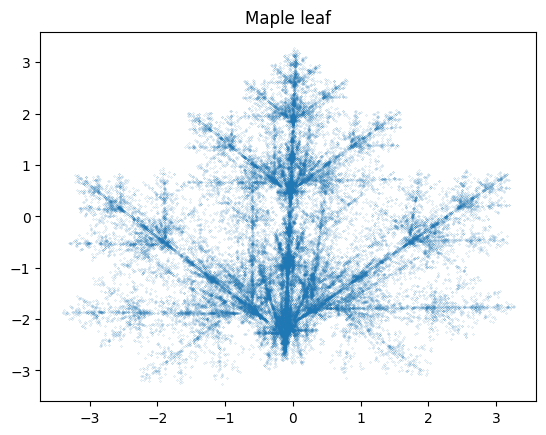

In [32]:
plot_by_rule("Maple leaf", maple_leaf, M=1_000, n=50_000, s=.01)

In [6]:
spiral = [{
    'a': 0.787879, 'b': -0.424242, 'e': 1.758647,
    'c': 0.242424, 'd': 0.859848, 'f': 1.408065,
    'p': 0.9,
    }, {
    'a': -0.121212, 'b': 0.257576, 'e': -6.721654,
    'c': 0.151515, 'd': 0.053030, 'f': 1.377236,
    'p': 0.05,
    }, {
    'a': 0.181818, 'b': -0.136364, 'e': 6.086107,
    'c': 0.090909, 'd': 0.181818, 'f': 1.568035,
    'p': 0.05,
    }]

check_ruleS(spiral)

All OK


True

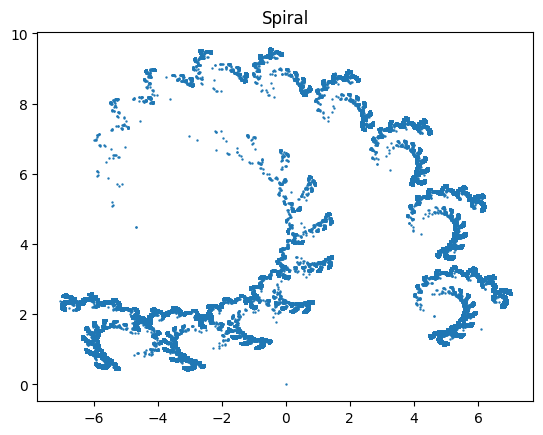

In [7]:
plot_by_rule("Spiral", spiral, M=100_000, n=1000_000)

In [8]:
# madelbort_like = [
#     {
#         'a':
#         'b':
#         'c':
#         'd':
#         'e':
#         'f':
#         'p':
#     },
# ]

madelbort_like = [
    {
        'a':.202,
        'b':-.805,
        'c':-.689,
        'd':-.342,
        'e':-.373,
        'f':-.653,
        'p':.5,
    },{
        'a':.138,
        'b':.665,
        'c':-.502,
        'd':-.222,
        'e':.66,
        'f':-.277,
        'p':.5,
    },
]

check_ruleS(madelbort_like)

All OK


True

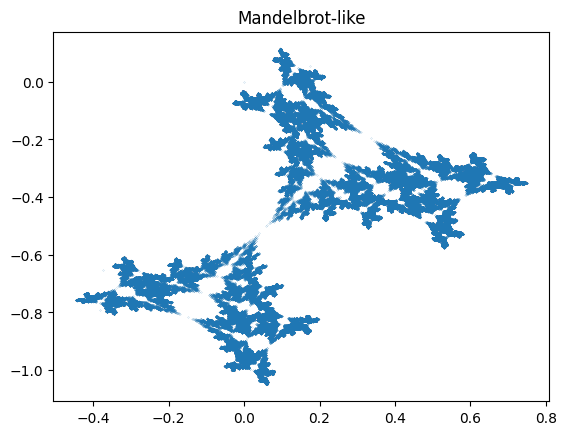

In [9]:
plot_by_rule("Mandelbrot-like", madelbort_like, M=100_000, n=1000_000, s=.01)

In [10]:
fractal_tree_1 = [
    {#1
        'a':.05,
        'b':.0,
        'c':.0,
        'd':.4,
        'e':-.06,
        'f':-.47,
        'p':1/7,
    },{#2
        'a':-.05,
        'b':.0,
        'c':.0,
        'd':-.4,
        'e':-.06,
        'f':-.47,
        'p':1/7,
    },{#3
        'a':.03,
        'b':-.14,
        'c':.0,
        'd':.26,
        'e':-.16,
        'f':-.01,
        'p':1/7,
    },{#4
        'a':-.03,
        'b':.14,
        'c':.0,
        'd':-.26,
        'e':-.16,
        'f':-.01,
        'p':1/7,
    },{#5
        'a':.56,
        'b':.44,
        'c':-.37,
        'd':.51,
        'e':.3,
        'f':.15,
        'p':1/7,
    },{#6
        'a':.19,
        'b':.07,
        'c':-.1,
        'd':.15,
        'e':-.2,
        'f':.28,
        'p':1/7,
    },{#7
        'a':-.33,
        'b':-.34,
        'c':-.33,
        'd':.34,
        'e':-.54,
        'f':.39,
        'p':1/7,
    },
]

check_ruleS(fractal_tree_1)

All OK


True

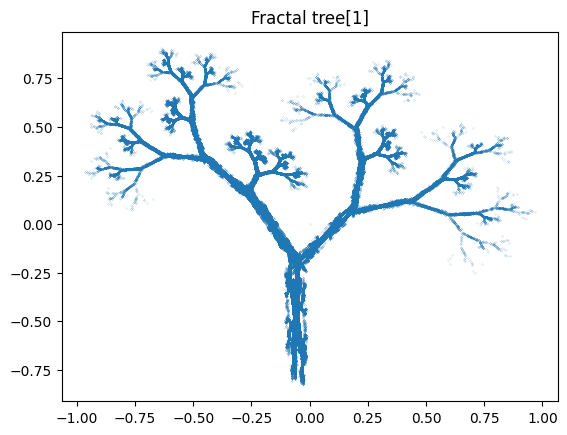

In [11]:
plot_by_rule("Fractal tree[1]", fractal_tree_1, M=100_000, n=1000_000, s=.01)

In [12]:
fractal_tree_3 = [
    {#1
        'a':.01,
        'b':.0,
        'c':.0,
        'd':.45,
        'e':.0,
        'f':.0,
        'p':1/4,
    },{#2
        'a':-.01,
        'b':.0,
        'c':.0,
        'd':-.45,
        'e':.0,
        'f':.4,
        'p':1/4,
    },{#3
        'a':.42,
        'b':-.42,
        'c':.42,
        'd':.42,
        'e':.0,
        'f':.4,
        'p':1/4,
    },{#4
        'a':.42,
        'b':.42,
        'c':-.42,
        'd':.42,
        'e':.0,
        'f':.4,
        'p':1/4,
    },
]

check_ruleS(fractal_tree_3)

All OK


True

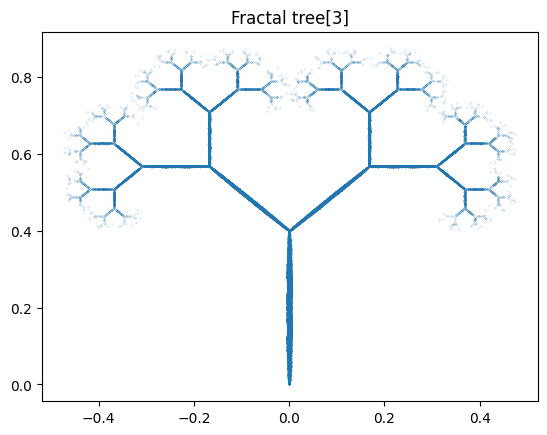

In [13]:
plot_by_rule("Fractal tree[3]", fractal_tree_3, M=10_000, n=100_000, s=.01)

In [33]:
fractal_tree_4 = [
    {#1
        'a':.195,
        'b':-.488,
        'c':.344,
        'd':.443,
        'e':.4431,
        'f':.2452,
        'p':1/5,
    },{#2
        'a':.462,
        'b':.414,
        'c':-.252,
        'd':.361,
        'e':.2511,
        'f':.5692,
        'p':1/5,
    },{#3
        'a':-.637,
        'b':.0,
        'c':.0,
        'd':.501,
        'e':.8562,
        'f':.2512,
        'p':1/5,
    },{#4
        'a':-.035,
        'b':.07,
        'c':-.469,
        'd':.022,
        'e':.4884,
        'f':.5069,
        'p':1/5,
    },{#5
        'a':-.058,
        'b':-.7, # прикольне дерево при b=-.7
        'c':.453,
        'd':-.111,
        'e':.5976,
        'f':.0969,
        'p':1/5,
    },
]

check_ruleS(fractal_tree_4)

All OK


True

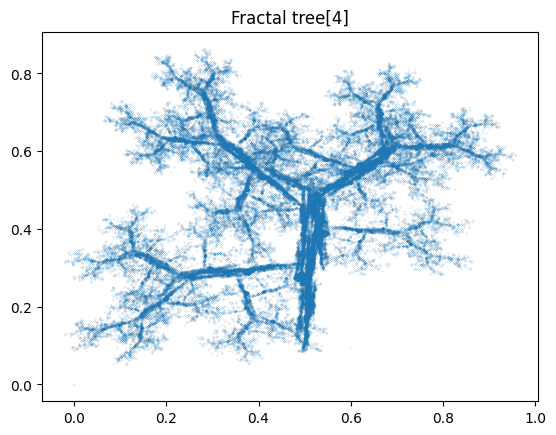

In [34]:
plot_by_rule("Fractal tree[4]", fractal_tree_4, M=10_000, n=100_000, s=.01)

In [16]:
fractal_leaf = [
    {#1
        'a':.0,
        'b':.2439,
        'c':.0,
        'd':.3053,
        'e':.0,
        'f':.0,
        'p':1/4,
    },{#2
        'a':.7248,
        'b':.0337,
        'c':-.0253,
        'd':.7426,
        'e':.206,
        'f':.2538,
        'p':1/4,
    },{#3
        'a':.1583,
        'b':-.1297,
        'c':.355,
        'd':.3676,
        'e':.1383,
        'f':.175,
        'p':1/4,
    },{#4
        'a':.3386,
        'b':.3694,
        'c':.2227,
        'd':-.0756,
        'e':.0679,
        'f':.0826,
        'p':1/4,
    },
]

check_ruleS(fractal_leaf)

All OK


True

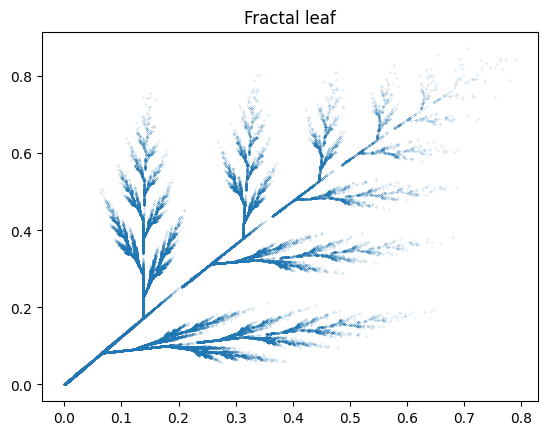

In [17]:
plot_by_rule("Fractal leaf", fractal_leaf, M=10_000, n=100_000, s=.01)

In [18]:
fractal_sand_dollar_snowflake = [
    {#1
        'a':.382,
        'b':.0,
        'c':.0,
        'd':.382,
        'e':.309,
        'f':.57,
        'p':1/6,
    },{#2
        'a':.118,
        'b':-.3633,
        'c':.3633,
        'd':.118,
        'e':.3633,
        'f':.3306,
        'p':1/6,
    },{#3
        'a':.118,
        'b':.3633,
        'c':-.3633,
        'd':.118,
        'e':.5187,
        'f':.694,
        'p':1/6,
    },{#4
        'a':-.309,
        'b':-.2245,
        'c':.2245,
        'd':-.309,
        'e':.607,
        'f':.309,
        'p':1/6,
    },{#5
        'a':-.309,
        'b':.2245,
        'c':-.2245,
        'd':-.309,
        'e':.7016,
        'f':.5335,
        'p':1/6,
    },{#6
        'a':.382,
        'b':.0,
        'c':.0,
        'd':-.382,
        'e':.309,
        'f':.677,
        'p':1/6,
    },
]

check_ruleS(fractal_sand_dollar_snowflake)

All OK


True

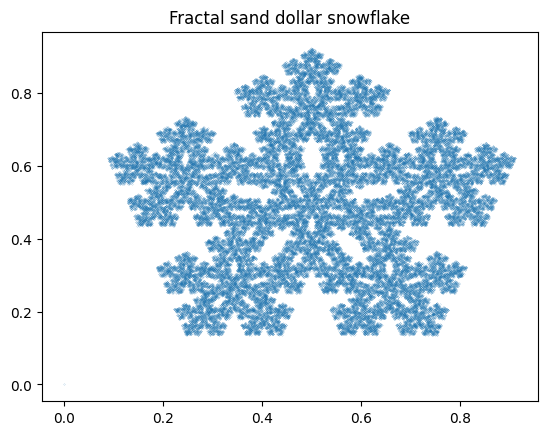

In [19]:
plot_by_rule("Fractal sand dollar snowflake", fractal_sand_dollar_snowflake, M=10_000, n=100_000, s=.01)

In [20]:
fractal_fern = [
    {#1
        'a':.0,
        'b':.0,
        'c':.0,
        'd':.16,
        'e':.0,
        'f':.0,
        'p':.1,
    },{#2
        'a':.2,
        'b':-.26,
        'c':.23,
        'd':.22,
        'e':.0,
        'f':1.6,
        'p':.08,
    },{#3
        'a':-.15,
        'b':.28,
        'c':.26,
        'd':.24,
        'e':.0,
        'f':.44,
        'p':.08,
    },{#4
        'a':.75,
        'b':.04,
        'c':-.04,
        'd':.85,
        'e':.0,
        'f':1.6,
        'p':.74,
    },
]

check_ruleS(fractal_fern)

All OK


True

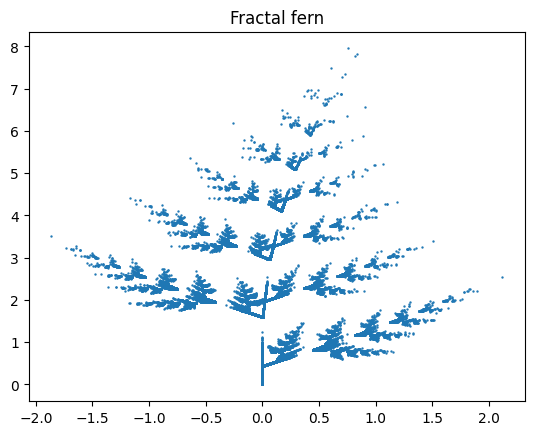

In [21]:
plot_by_rule("Fractal fern", fractal_fern, M=10_000, n=100_000)

In [22]:
unnamed_fractal = [
    {#1
        'a':.0,
        'b':.0,
        'c':.0,
        'd':.16,
        'e':.0,
        'f':.0,
        'p':.01,
    },{#2
        'a':.2,
        'b':-.26,
        'c':.23,
        'd':.22,
        'e':.0,
        'f':1.6,
        'p':.07,
    },{#3
        'a':-.15,
        'b':.28,
        'c':.26,
        'd':.24,
        'e':.0,
        'f':.44,
        'p':.07,
    },{#4
        'a':.85,
        'b':.04,
        'c':-.04,
        'd':.85,
        'e':.0,
        'f':1.6,
        'p':.85,
    },
]

check_ruleS(unnamed_fractal)

All OK


True

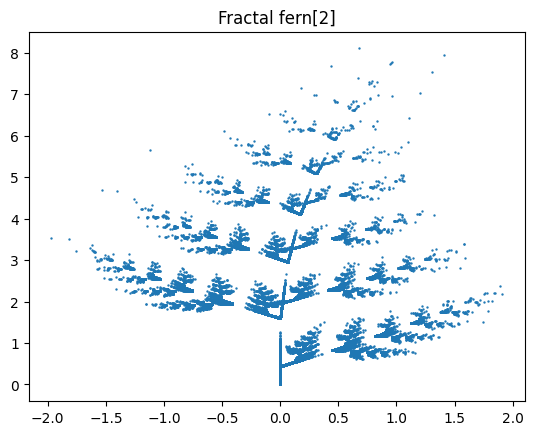

In [23]:
plot_by_rule("Fractal fern[2]", unnamed_fractal, M=10_000, n=100_000)

In [24]:
IFS_CHAOS_text = [
    {#1
        'a':.0,
        'b':.053,
        'c':-.429,
        'd':.0,
        'e':-7.083,
        'f':5.43,
        'p':1/19,
    },{#2
        'a':.143,
        'b':.0,
        'c':.0,
        'd':-.053,
        'e':-5.619,
        'f':8.513,
        'p':1/19,
    },{#3
        'a':.143,
        'b':.0,
        'c':.0,
        'd':.083,
        'e':-5.619,
        'f':2.057,
        'p':1/19,
    },{#4
        'a':.0,
        'b':.053,
        'c':.429,
        'd':.0,
        'e':-3.952,
        'f':5.43,
        'p':1/19,
    },{#5
        'a':.119,
        'b':.0,
        'c':.0,
        'd':.053,
        'e':-2.555,
        'f':4.536,
        'p':1/19,
    },{#6
        'a':-.0123806,
        'b':-.0649723,
        'c':.423819,
        'd':.00189797,
        'e':-1.226,
        'f':5.235,
        'p':1/19,
    },{#7
        'a':.0852291,
        'b':.0506328,
        'c':.420449,
        'd':.0156626,
        'e':-.421,
        'f':4.569,
        'p':1/19,
    },{#8
        'a':.104432,
        'b':.00529117,
        'c':.0570516,
        'd':.0527352,
        'e':.976,
        'f':8.113,
        'p':1/19,
    },{#9
        'a':-.00814186,
        'b':-.0417935,
        'c':.423922,
        'd':.00415972,
        'e':1.934,
        'f':5.37,
        'p':1/19,
    },{#10
        'a':.093,
        'b':.0,
        'c':.0,
        'd':.053,
        'e':.81,
        'f':4.536,
        'p':1/19,
    },{#11
        'a':.0,
        'b':.053,
        'c':-.429,
        'd':.0,
        'e':2.447,
        'f':5.43,
        'p':1/19,
    },{#12
        'a':.119,
        'b':.0,
        'c':.0,
        'd':-.053,
        'e':3.363,
        'f':8.513,
        'p':1/19,
    },{#13
        'a':.119,
        'b':.0,
        'c':.0,
        'd':.053,
        'e':3.363,
        'f':1.487,
        'p':1/19,
    },{#14
        'a':.0,
        'b':.053,
        'c':.429,
        'd':.0,
        'e':3.972,
        'f':4.569,
        'p':1/19,
    },{#15
        'a':.123998,
        'b':-.00183957,
        'c':.000691208,
        'd':.0629731,
        'e':6.275,
        'f':7.716,
        'p':1/19,
    },{#16
        'a':.0,
        'b':.053,
        'c':.167,
        'd':.0,
        'e':5.215,
        'f':6.483,
        'p':1/19,
    },{#17
        'a':.071,
        'b':.0,
        'c':.0,
        'd':.053,
        'e':6.279,
        'f':5.298,
        'p':1/19,
    },{#18
        'a':.0,
        'b':-.053,
        'c':-.238,
        'd':.0,
        'e':6.805,
        'f':3.714,
        'p':1/19,
    },{#19
        'a':-.121,
        'b':.0,
        'c':.0,
        'd':.053,
        'e':5.941,
        'f':1.487,
        'p':1/19,
    },
]

# {#1
#         'a':
#         'b':
#         'c':
#         'd':
#         'e':
#         'f':
#         'p':1/19,
#     },

check_ruleS(IFS_CHAOS_text)

All OK


True

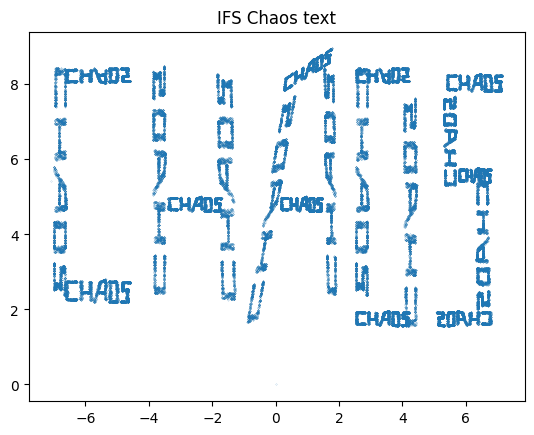

In [25]:
plot_by_rule("IFS Chaos text", IFS_CHAOS_text, M=10_000, n=100_000, s=.01)

In [26]:
IFS_Dragon = [
    {#1
        'a':.824074,
        'b':.281428,
        'c':-.212346,
        'd':.864198,
        'e':-1.88229,
        'f':-.110607,
        'p':.8,
    },{#2
        'a':.088272,
        'b':.520988,
        'c':-.463889,
        'd':-.377778,
        'e':.78536,
        'f':8.095795,
        'p':.2,
    },
]

check_ruleS(IFS_Dragon)

All OK


True

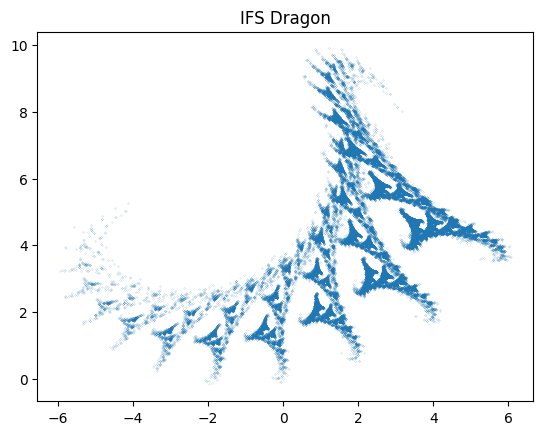

In [27]:
plot_by_rule("IFS Dragon", IFS_Dragon, M=10_000, n=100_000, s=.01)

In [28]:
IFS_branch = [
    {#1
        'a':.387,
        'b':.43,
        'c':.43,
        'd':-.387,
        'e':.256,
        'f':.522,
        'p':1/3,
    },{#2
        'a':.441,
        'b':-.091,
        'c':-.009,
        'd':-.322,
        'e':.4219,
        'f':.5059,
        'p':1/3,
    },{#3
        'a':-.468,
        'b':.02,
        'c':-.113,
        'd':.015,
        'e':.4,
        'f':.4,
        'p':1/3,
    },
]

check_ruleS(IFS_branch)

All OK


True

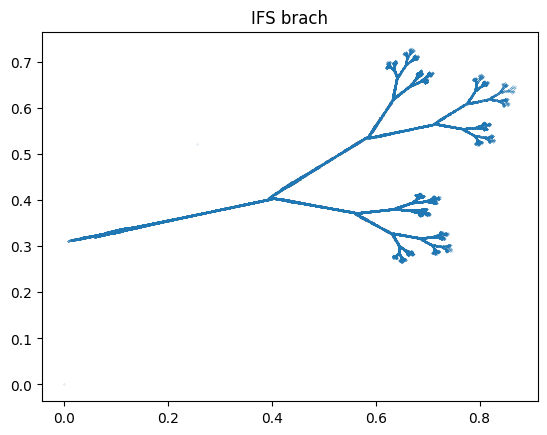

In [29]:
plot_by_rule("IFS brach", IFS_branch, M=10_000, n=100_000, s=.01)

In [30]:
IFS_xmastree = [
    {#1
        'a':.0,
        'b':-.5,
        'c':.5,
        'd':.0,
        'e':.5,
        'f':.0,
        'p':1/3,
    },{#2
        'a':.0,
        'b':.5,
        'c':-.5,
        'd':.0,
        'e':.5,
        'f':.5,
        'p':1/3,
    },{#3
        'a':.5,
        'b':.0,
        'c':.0,
        'd':.5,
        'e':.25,
        'f':.5,
        'p':1/3,
    },
]

check_ruleS(IFS_xmastree)

All OK


True

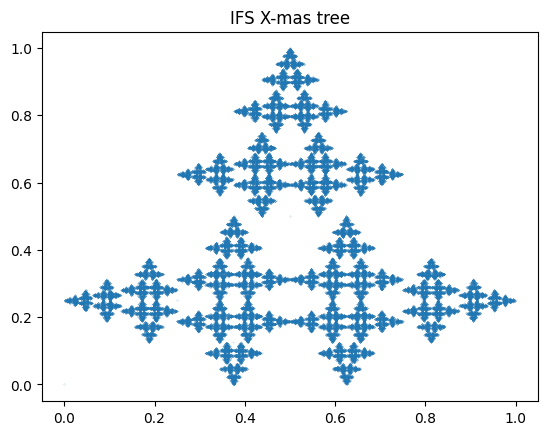

In [31]:
plot_by_rule("IFS X-mas tree", IFS_xmastree, M=10_000, n=100_000, s=.01)